# Testing the Accuracy of Machine Learning Models for Data Classification

**Author:** Alperen Karadağ &emsp; **Date:** 20.08.2024

In this notebook, we will explore and evaluate the performance of various **machine learning algorithms** for the task of **data classification**. Accurate classification is critical in numerous applications, ranging from medical diagnosis to financial forecasting. By testing different algorithms, we can identify which models are best suited for our specific dataset and classification problem.

We will begin by loading and preprocessing the dataset, followed by training several machine learning models. We will then assess their accuracy and other performance metrics using techniques such as **confusion matrices**, **classification reports**, and **cross-validation**. The goal is to determine the algorithm with the highest **accuracy** in a real life application, providing insight into the most effective approach for this kind of classification.

The predictive modeling problem of this example is in relation to a **student performance dataset**, which includes comprehensive information regarding **over 2300** high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. All of these variables represent categorical data in the form of integers. The target variable, **_GradeClass_**, classifies students' grades into distinct categories, and will serve as the precedent for the performance of each machine learning algorithm. This means our example will serve as a good example of a **classification problem**.

The source of the data set can be found on [this](https://www.kaggle.com/ds/5195702) page on Kaggle.

## Importing the Necessary Modules

In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis.
import numpy as np  # Import NumPy for numerical operations and array handling.
import matplotlib.pyplot as plt  # Import Matplotlib for creating static visualizations and plots.
import seaborn as sns  # Import Seaborn for statistical data visualization, built on top of Matplotlib.

## Displaying the Dataset

The **DataFrame** object provided by the Pandas module will be used to examine and process the student performance data. The **_read_csv()_** method is especially useful to carry this out as it returns a DataFrame object with rows and columns corresponding to the rows and columns in the file.

In [3]:
df = pd.read_csv('Int1/student_data .csv') # Copy and paste the file path of the csv file.
df # Call the initialized data frame.

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


To see all rows in the data set, use this line of code and call the **_'df'_** data frame at the top again.

In [578]:
df = pd.set_option('display.max_rows', 2400) # Any number more than or equal to the total number of rows will just show all rows.

But showing the beginning of the data set will be enough for us.

In [1032]:
df.head(10) # Displays the first 5 rows of data by default but the first 10 rows are called in this example.

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


## Preparing the Data for Training

The data set contains a wide range of information that has been determined to affect the target variable, **_GradeClass_** , the details of these categories have been laid out in the original source. But **_StudentID_** is the exception in this situation, as it only serves to act as unique qualifier to efficiently identify individual students, so it needs to be dropped from the dataset before training the machine learning models.

In [319]:
df = df.drop('StudentID', axis=1) # Removes the specified field from the data frame (axis=0 for removing rows and 1 for columns)

In [516]:
df.head(10)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


## Display the GradeClass variable on a Histogram

The **Matplotlib** module comes in handy for plotting various types of graphs for data analysis. The distribution of the **_GradeClass_** categories can be plot on an histogram to get a clear visualization of the data.

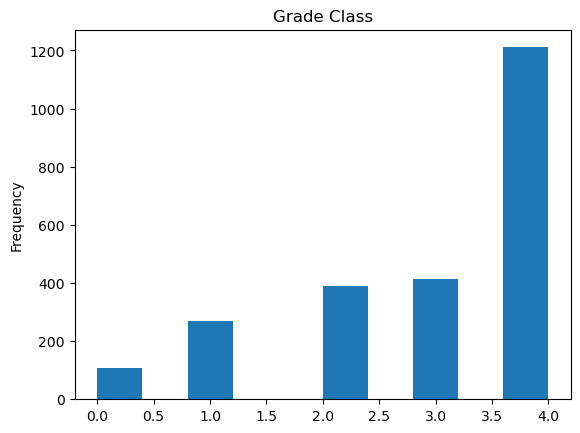

In [323]:
ax = df['GradeClass'].plot(kind='hist', bins=10, title='Grade Class') # Graph type, distance between the data and graph title as params

Now that the dataset is ready to analyze, we can discuss the learning models we'll put to use.

## Supervised Classification Models

We'll be using a total of 6 training models provided in the Scikit-learn module. These being:

**1.[Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#categoricalnb):**
- A Naive Bayes classifier tailored for categorical features, where the model assumes that the features are distributed according to a categorical distribution. It’s particularly useful when your data consists of discrete categories, allowing for effective classification by leveraging the simplicity and efficiency of Naive Bayes.
  
**2.[Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#multinomialnb):**
- Designed for classification tasks where features represent discrete counts, such as word frequencies in text classification. This variant of Naive Bayes assumes that the features follow a multinomial distribution, making it ideal for applications like document classification, where feature counts are integral to the model's effectiveness.

**3.[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):**
- A model that predicts the value of a target variable by applying a series of decision rules based on feature values. The model constructs a tree where each node represents a decision based on a feature, and each leaf represents a predicted outcome. Decision trees are interpretable and capable of handling both categorical and numerical data, making them versatile for various classification tasks.
  
**4.[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier):**
- An ensemble learning method that builds multiple decision trees on different subsets of the training data and averages their predictions to improve accuracy and prevent overfitting. This method enhances the robustness of predictions by reducing the variance associated with single decision trees, leading to more reliable classification results.

**5.[Support Vector Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC):**
- A classification algorithm that finds the optimal boundary (or hyperplane) that separates data points of different classes. SVC is particularly effective in high-dimensional spaces and is versatile, allowing for the use of different kernel functions to handle various types of data distributions. It’s also efficient in terms of memory, as it only uses the most critical data points, known as support vectors, for decision making.

**6.[K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier):**
- A classification technique based on instance-based learning, where the class of a data point is determined by the majority class among its nearest neighbors. KNN does not create an explicit model but instead stores all training data, making predictions by examining the closest examples. This method is simple, intuitive, and effective, especially when the decision boundary is irregular or complex.

## Initializing the Train and Test Variables

In [328]:
from sklearn.model_selection import train_test_split 

This module is used to **split** the dataset into a **training set**, which is used to train your machine learning model, and a **test set**, which is used to evaluate the model’s performance.

In [330]:
X = df.drop(['GradeClass'], axis=1) # Everything but target variable

In [331]:
y = df['GradeClass'] # Target variable

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

The **_train_test_split_** method consists of these parameters:
- **_X_**: The feature matrix (input data).
- **_y_**: The target vector (output labels).
- **_test_size_**: Specifies the proportion of the dataset to include in the test split (e.g., 0.2 means 20% for testing and 80% for training).
- **_random_state_**: Controls the shuffling applied to the data before the split. Setting this ensures reproducibility of the split.
- **_X_train_, _X_test_**: The training and testing portions of the feature matrix.
- **_y_train_, _y_test_**: The training and testing portions of the target vector.

## Setting Up a Training Model (Categorical Naive Bayes)

In [928]:
from sklearn.naive_bayes import CategoricalNB # Import the scikit-learn model.

In [930]:
cnb = CategoricalNB() # Initialize the model.

## Fitting the Model

The **_fit_** method is used to train or "fit" a machine learning model to the training data. It is the step where the model learns the relationships between the **input data** (features) and the **target labels** (outputs). The fitted model is displayed as seen down **below**.

In [339]:
cnb.fit(X_train, y_train) 

CategoricalNB()

## Making Predictions Using the Model

The **_predict_** method is uses the patterns it learned during the fit process to generate predictions for new input data **_X_test_**.

In [342]:
y_pred = cnb.predict(X_test)

In [926]:
y_pred # Call the prediction array.

array([3., 1., 4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 3., 3., 1., 4., 2.,
       4., 2., 2., 1., 4., 3., 0., 2., 4., 3., 3., 4., 4., 3., 4., 2., 3.,
       4., 3., 4., 1., 4., 3., 4., 3., 2., 4., 3., 4., 1., 4., 4., 4., 2.,
       4., 0., 2., 1., 4., 1., 4., 4., 4., 4., 4., 2., 4., 4., 2., 4., 2.,
       4., 3., 2., 4., 3., 0., 4., 4., 2., 1., 4., 4., 4., 3., 2., 2., 2.,
       4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       2., 4., 4., 4., 4., 4., 1., 2., 3., 2., 4., 4., 1., 4., 3., 4., 4.,
       4., 1., 3., 4., 3., 4., 4., 2., 4., 3., 3., 4., 4., 2., 2., 4., 4.,
       4., 3., 3., 3., 4., 2., 4., 4., 4., 4., 4., 2., 3., 4., 4., 1., 2.,
       3., 4., 2., 2., 4., 4., 2., 4., 1., 4., 2., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 3., 2., 4., 2., 4., 4., 2., 0., 1., 4., 4.,
       1., 4., 2., 3., 4., 2., 2., 4., 4., 4., 4., 4., 4., 4., 2., 1., 2.,
       3., 3., 1., 2., 2., 4., 4., 3., 3., 1., 4., 4., 4., 3., 3., 3., 2.,
       3., 3., 4., 3., 1.

For classification tasks, predict returns class labels in an **array**.

## Analyzing Test Results

There are several metrics used to gauge the performance of a predictive model. Although **accuracy** will serve as the main point of comparison among the models, the other metrics will be touched on as well.

The **_accuracy_score()_** method calculates the proportion of correct predictions out of all predictions made.

In [348]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8204592901878914

Inputting the test data as input to the **score()** method also gives the accuracy for classification models.

In [350]:
cnb.score(X_test, y_test)

0.8204592901878914

You can figure out how well the model performs on the data it was **trained on** too, but since the testing data is what is taken into consideration, it ends up being a **trivial** fact that shouldn't be mixed up with the accuracy of the **test data**.

In [352]:
cnb.score(X_train, y_train)

0.8374281233664401

A **classification report** provides a detailed summary of the performance of a classification model. It includes several important metrics for evaluating the quality of predictions for each data label:

**1.Precision:**
- The ratio of correctly predicted positive observations to the total predicted positives.
  
**2.Recall:**
- The ratio of correctly predicted positive observations to all observations in the actual class. Also known as **'Sensitivity'** or **'True Positive Rate'**.

**3.F1-Score:**
- The weighted average of Precision and Recall, providing a single metric that balances both concerns.

**4.Support:**
- The number of actual occurrences of each class in the dataset.

What are also included in the report are the general values of:

**Accuracy:**
- The overall accuracy of the model.

**Macro Avg:**
  - The unweighted mean of the precision, recall, and F1-score across all classes.

**Weighted Avg:**
 - The weighted mean of the precision, recall, and F1-score, with weights corresponding to the number of instances in each class (i.e., the support).

It can be created usin the aptly named **_classification_report()_** method.

In [354]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.11      0.17        19
         1.0       0.73      0.80      0.76        46
         2.0       0.65      0.68      0.66        81
         3.0       0.71      0.64      0.67        85
         4.0       0.93      0.99      0.96       248

    accuracy                           0.82       479
   macro avg       0.70      0.64      0.65       479
weighted avg       0.81      0.82      0.81       479



Just to be clear, other performance metrics can be individually calculated as well, by using the **precision_score()** method for finding the precisison for example.

In [356]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
precision

0.7029268541517067

A **confusion matrix** is a performance evaluation tool used in classification tasks to visualize the accuracy of a model's predictions by comparing the actual class labels with the predicted class labels. It helps you understand how well your model is performing, particularly by showing how many instances of each class were correctly or incorrectly classified. The closer the predicted values are to a **main diagonal**, the better the performance of the model. The **_confusion_matrix()_** method in this case returns the confusion matrix as an **array**.

In [358]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
confusion_matrix(y_test, y_pred)

array([[  2,  11,   3,   2,   1],
       [  1,  37,   2,   0,   6],
       [  0,   1,  55,  18,   7],
       [  1,   2,  24,  54,   4],
       [  0,   0,   1,   2, 245]])

A **heatmap** is a data visualization technique that uses color to represent values in a matrix. It is particularly useful for displaying the values of a matrix or table in a way that makes it easy to see patterns, correlations, and trends. The **Seaborn** module is put to use here, because t provides a high-level interface for drawing attractive and informative statistical graphics, including heatmaps.

The **_heat_plot()_** fuction is defined here to make the process neat and straightforward.

In [360]:
def heat_plot(ytest, ypred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(ytest, ypred), columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

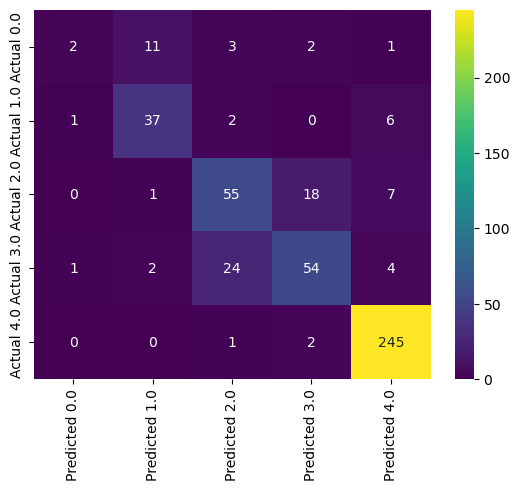

In [361]:
heat_plot(y_test, y_pred)

A **normalized heatmap** is a type of heatmap where the values in a matrix are adjusted to a **common scale**, making it easier to compare data across different ranges or categories. 

Normalization ensures that the data values are transformed into a specific range, such as **0 to 1**, which allows for better visual comparison and interpretation. 

Both types of heatmaps have their use in certain scenarios, but we'll be displaying **just** the normalized heatmap from this point onward.

In [363]:
def normal_heat_plot(ytest, ypred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(ytest, ypred, normalize='true'), columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='f', cmap='viridis')

<Axes: >

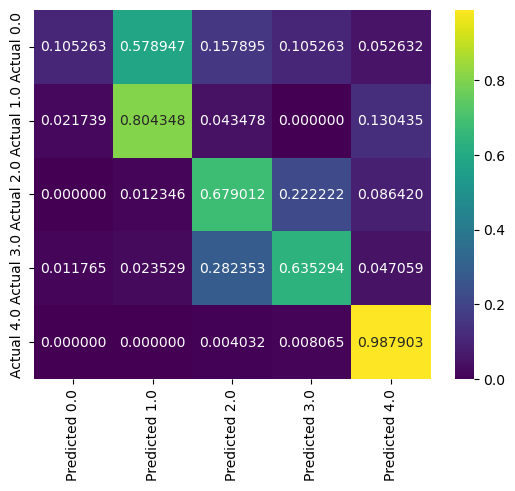

In [364]:
normal_heat_plot(y_test, y_pred)

The performance of the model's been made much clearer to see this way.

With that, we've **completed** analyzing our first model. The rest of the models will follow are mostly similar process but they do have their **differences** in implementation of course.

## Training the Multinomial Naive Bayes Model

As a variant of the core **Naive Bayes** model, MultinomialNB is pretty much identical in its implementation as the **CategoricalNB**, but we'll witness something **strange** about its performance in the classification report. 

In [970]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB() 

In [972]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [974]:
y_predm = mnb.predict(X_test)

In [976]:
print(classification_report(y_test, y_predm))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.49      0.72      0.58        46
         2.0       0.60      0.51      0.55        81
         3.0       0.58      0.53      0.56        85
         4.0       0.86      0.92      0.89       248

    accuracy                           0.72       479
   macro avg       0.51      0.53      0.51       479
weighted avg       0.70      0.72      0.71       479



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Unlike the CategoricalNB model, we've encountered output regarding an **UndefinedMetricWarning**, which states that one of the data labels is empty. This is not something to worry about, as it means that the model simply didn't categorize any test data under that label, in accordance with what the learning model learned from the training data. The label in question (**_0_**) occuring less frequently in the training dataset, compared to the other labels, can also make it more likely for the model to mislabel those instances.

We can look at the prediction array returned by the **_predict()_** method to see if this is actually the case.

In [978]:
y_predm

array([3., 1., 4., 2., 4., 2., 4., 4., 4., 4., 3., 3., 3., 4., 1., 4., 1.,
       4., 2., 1., 1., 4., 3., 1., 3., 4., 3., 3., 4., 4., 3., 4., 1., 3.,
       4., 4., 4., 1., 4., 3., 4., 3., 2., 4., 3., 4., 1., 4., 4., 4., 2.,
       4., 1., 2., 1., 4., 1., 4., 4., 4., 4., 4., 2., 4., 3., 3., 4., 2.,
       4., 4., 3., 4., 3., 1., 4., 4., 3., 1., 4., 4., 4., 3., 3., 2., 2.,
       4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       2., 4., 4., 4., 4., 4., 1., 3., 3., 2., 4., 4., 1., 4., 3., 4., 4.,
       4., 1., 3., 3., 3., 4., 4., 2., 4., 2., 2., 4., 4., 2., 2., 3., 4.,
       4., 4., 4., 3., 4., 2., 4., 3., 4., 4., 4., 1., 4., 4., 4., 1., 1.,
       3., 4., 2., 2., 4., 4., 2., 4., 1., 4., 2., 2., 4., 4., 4., 4., 4.,
       3., 3., 4., 3., 4., 4., 2., 1., 2., 2., 3., 4., 2., 1., 1., 4., 4.,
       1., 4., 1., 2., 4., 3., 1., 4., 4., 4., 4., 4., 3., 4., 2., 1., 3.,
       3., 2., 1., 1., 3., 4., 4., 3., 4., 1., 3., 4., 4., 3., 3., 4., 2.,
       3., 3., 4., 3., 1.

As we can see, the model didn't predict the label **_0_** for **any** of the samples, just like the warning stated. But we now know that this is a genuine result of our testing and not a mistake on our part.

NB models do have an **alpha** parameter you can alter, that is used for smoothing probability estimates, especially when certain features have zero counts for a particular class in the training data. But this wouldn't have any effect in our case, since it does not influence the model’s ability to predict all possible labels. The sheer **imbalance** of the dataset is the culprit in this situation and is **essential** detail to consider in predictive modeling.

What we **can** do though is to take care of the warning in this case is to import the **_warnings_** module to catch the warning and print a notification message whenever one or more of the labels have been left empty.

In [980]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress the specific warning and print a notification message instead.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    print(classification_report(y_test, y_predm)) # Check if any warnings were triggered
    if any(issubclass(warn.category, UndefinedMetricWarning) for warn in w):
        print("Note: One or more labels with no predicted samples in the test data.")

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.49      0.72      0.58        46
         2.0       0.60      0.51      0.55        81
         3.0       0.58      0.53      0.56        85
         4.0       0.86      0.92      0.89       248

    accuracy                           0.72       479
   macro avg       0.51      0.53      0.51       479
weighted avg       0.70      0.72      0.71       479

Note: One or more labels with no predicted samples in the test data.


With this, we now get a much cleaner message that shows we're fully aware of what's going on. And since the other models may also produce prediction data with empty labels, this code block will be used in the remaining models to print the classification report.

In [982]:
accuracy_score(y_test, y_predm) # Accuracy score of MultinomialNB

0.7244258872651357

<Axes: >

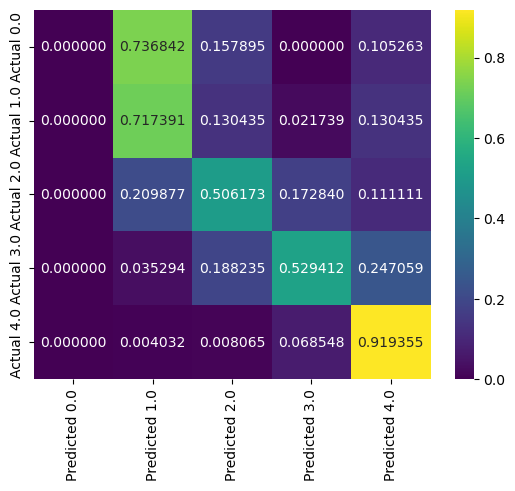

In [984]:
normal_heat_plot(y_test, y_predm) # Heatmap of MultinomialNB

## Training the Decision Tree Classifier Model

In [538]:
from sklearn.tree import DecisionTreeClassifier

The key detail in training the decision tree classifier is to set the **_random_state_** parameter to a fixed integer value, so that the model's accuracy scores will be reproducable across separate runs of the code.

In [540]:
dtc = DecisionTreeClassifier(random_state=10)
dtc = dtc.fit(X_train, y_train)

In [542]:
y_predc = dtc.predict(X_test)

In [544]:
# Suppress the specific warning and print a notification message instead.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    print(classification_report(y_test, y_predc)) # Check if any warnings were triggered
    if any(issubclass(warn.category, UndefinedMetricWarning) for warn in w):
        print("Note: One or more labels with no predicted samples in the test data.")
  

              precision    recall  f1-score   support

         0.0       0.52      0.74      0.61        19
         1.0       0.69      0.67      0.68        46
         2.0       0.77      0.79      0.78        81
         3.0       0.81      0.74      0.77        85
         4.0       0.89      0.89      0.89       248

    accuracy                           0.82       479
   macro avg       0.74      0.77      0.75       479
weighted avg       0.82      0.82      0.82       479



In [546]:
accuracy_score(y_test, y_predc)

0.8183716075156576

In [548]:
dtc.score(X_test, y_test)

0.8183716075156576

<Axes: >

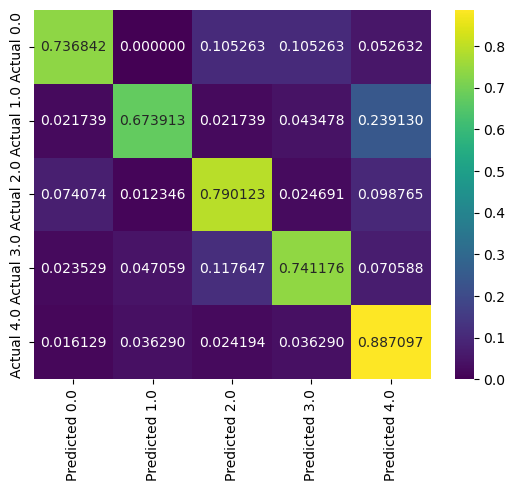

In [550]:
normal_heat_plot(y_test, y_predc)

## Training the Random Forrest Classifier Model

In [386]:
from sklearn.ensemble import RandomForestClassifier

The random forest classifier model has many parameters that have various effects on the performance, but only the ones appearing in the code cell above will be mentioned here, as the rest of them will stay at a default setting when not specified:

- **n_estimators:**
The number of trees in the forest. It is set to **100** by default. Increasing the number of trees usually improves the performance (reduces variance) but also increases the computation time. After a certain point, additional trees might not improve the model significantly.

- **criterion:**
The function to measure the quality of a split. The default setting **'gini'** but can also be **'entropy'**. Gini and entropy are both measures of impurity, but they are calculated differently. Typically, both give similar results.

- **max_depth:**
The **maximum depth** of each tree in the forest. Limits the number of levels in each tree. A shallow depth might **underfit**, while a very deep tree might **overfit**. By default, nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples (so **None**).

- **min_samples_split:**
The minimum number of samples required to split an internal node. Controls the **minimum number** of samples a node must have before it can be split. It is set to **2** by default. Higher values prevent the model from learning overly specific patterns (reduces overfitting).

- **random_state:**
Controls the randomness of the **bootstrapping** of the samples and the random selection of features. It is disabled by default but if set, it ensures **reproducibility** of the results. It is useful for comparing results across different runs.

In [388]:
rdf = RandomForestClassifier(n_estimators=200, criterion ="gini", max_depth=8, min_samples_split=10, random_state=5)
rdf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=200,
                       random_state=5)

In [389]:
y_predf = rdf.predict(X_test)

In [390]:
# Suppress the specific warning and print a notification message instead.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    print(classification_report(y_test, y_predf)) # Check if any warnings were triggered
    if any(issubclass(warn.category, UndefinedMetricWarning) for warn in w):
        print("Note: One or more labels with no predicted samples in the test data.")


              precision    recall  f1-score   support

         0.0       1.00      0.32      0.48        19
         1.0       0.78      0.83      0.80        46
         2.0       0.90      0.88      0.89        81
         3.0       0.93      0.89      0.91        85
         4.0       0.93      0.99      0.96       248

    accuracy                           0.91       479
   macro avg       0.91      0.78      0.81       479
weighted avg       0.91      0.91      0.90       479



In [391]:
accuracy_score(y_test, y_predf)

0.9102296450939458

<Axes: >

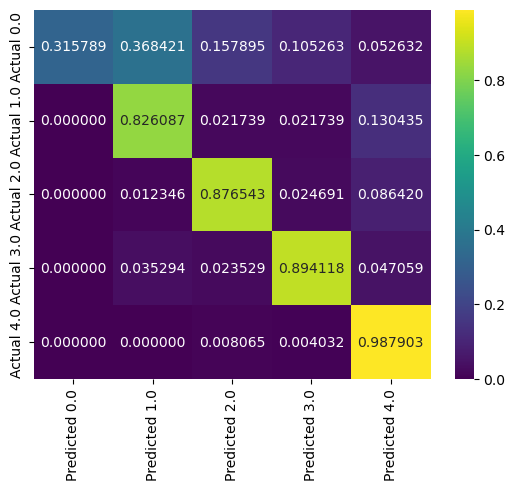

In [392]:
normal_heat_plot(y_test, y_predf)

## Training the Support Vector Classifier (SVC) Model

The support vector classifier model has an additional step that needs to be followed to produce a correct set of predictions, which is that it needs to be trained using a scaled dataset.

**Scaling** refers to the process of adjusting the range or distribution of feature values so that they are on a similar scale. This is particularly important for models like SVC beacause of their sensitivity to the magnitude of feature values. Without scaling, features with larger ranges or different units can **dominate** the distance calculations, **skewing** the results. It also helps the model to train faster and work more efficiently.

There is variation in how you can scale the data and train the model with it. We can utilize a **Pipeline** to first standardize the dataset for training with the **_StandardScaler()_** method to then directly fit the SVC model with the readied dataset, or you can initialize the scaler to transform and fit the variables **separately**. Both ways have been put into action here.

In [395]:
from sklearn.svm import SVC

In [396]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler

The **first approach** doesn't use a pipeline and individually transforms and fits the test variables into a model with **no specified parameters**, we'll see why leaving all parameters at default isn't optimal with the **second approach**.

In [398]:
scaler = StandardScaler() #
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC()
model.fit(X_train_scaled, y_train)

predy = model.predict(X_test_scaled)
accuracy_score(y_test, predy)

0.8100208768267223

The **second approach**, on the other hand, puts the scaler and the model in a Pipeline and processes the data in that fashion. Notice that this time, **multiple parameters** have been specified. 

In [400]:
smv = make_pipeline(StandardScaler(), SVC(gamma='auto', C=2, kernel='linear')) # Create a pipeline with StandardScaler and SVC
smv.fit(X_train, y_train) # Fit the pipeline to the training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2, gamma='auto', kernel='linear'))])

In [401]:
y_predv = smv.predict(X_test)

In [402]:
# Suppress the specific warning and print a notification message instead.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    print(classification_report(y_test, y_predv)) # Check if any warnings were triggered
    if any(issubclass(warn.category, UndefinedMetricWarning) for warn in w):
        print("Note: One or more labels with no predicted samples in the test data.")


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.61      0.72      0.66        46
         2.0       0.78      0.80      0.79        81
         3.0       0.90      0.81      0.85        85
         4.0       0.92      0.98      0.95       248

    accuracy                           0.86       479
   macro avg       0.64      0.66      0.65       479
weighted avg       0.83      0.86      0.84       479

Note: One or more labels with no predicted samples in the test data.


In [403]:
accuracy_score(y_test, y_predv)

0.8580375782881002

We can clearly see that fine tuning the parameters of an SVC model is **essential** to improve its performance, alongside scaling the dataset for its use. So **don't** overlook the sensitivity of this model.

When it comes to what its paramaters even are, there are many to mention, but like with the random forest, only the ones used in the code will be explained here.

**C:**
Controls the trade-off between maximizing the margin and minimizing classification errors. A smaller C creates a wider margin but allows for more misclassifications (more regularization). A larger C creates a narrower margin and tries to classify every training point correctly, which may lead to overfitting. It is set to 1.0 by default.

**kernel:**
Defines how the input data is transformed into a higher-dimensional space. Different kernels can be used depending on the nature of the data and the problem. The rbf kernel is often a good default choice, but if the data is linearly separable, the linear kernel might work better. It can be set to:
- **'linear'**: Linear kernel.
- **'poly'**: Polynomial kernel.
- **'rbf'**: Radial basis function kernel (a Gaussian kernel).
- **'sigmoid'**: Sigmoid kernel.
Custom kernel function (callable).


**gamma:**
Controls the influence of individual training examples. A small gamma means a large radius of influence for the support vectors, leading to a smoother decision boundary. A large gamma means a small radius of influence, which can lead to overfitting.
gamma='scale' is generally a good default. You can tune this parameter if your model is underfitting or overfitting. Its settings are:
- **'scale'**: Uses 1 / (n_features * X.var()) (default)
- **'auto'**: Uses 1 / n_features.
- A float value: Custom gamma value.

<Axes: >

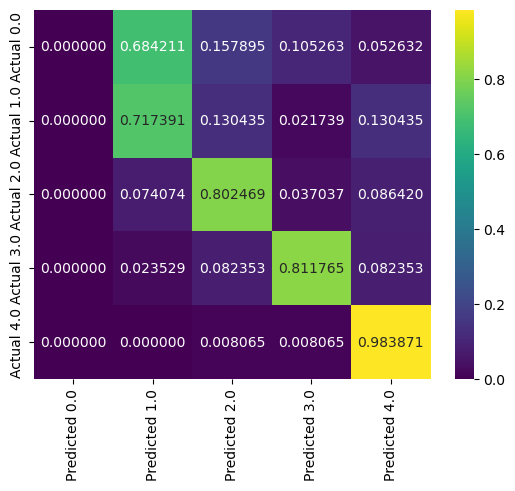

In [406]:
normal_heat_plot(y_test, y_predv)

## Training the K-Nearest Neighbors Model

In [408]:
from sklearn.neighbors import KNeighborsClassifier

In [409]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

The **n_neighbors** parameter determines **how many** of the closest training data points (neighbors) are considered when making a prediction for a new data point. The algorithm counts how many neighbors belong to each class, and the class with the most votes is assigned to the new data point. The default value is **5**.

In [411]:
y_predk = knn.predict(X_test)

In [412]:
# Suppress the specific warning and print a notification message instead.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    print(classification_report(y_test, y_predk)) # Check if any warnings were triggered
    if any(issubclass(warn.category, UndefinedMetricWarning) for warn in w):
        print("Note: One or more labels with no predicted samples in the test data.")


              precision    recall  f1-score   support

         0.0       0.46      0.32      0.38        19
         1.0       0.44      0.46      0.45        46
         2.0       0.54      0.53      0.54        81
         3.0       0.47      0.45      0.46        85
         4.0       0.85      0.89      0.87       248

    accuracy                           0.69       479
   macro avg       0.55      0.53      0.54       479
weighted avg       0.68      0.69      0.68       479



In [413]:
accuracy_score(y_test, y_predk)

0.6868475991649269

<Axes: >

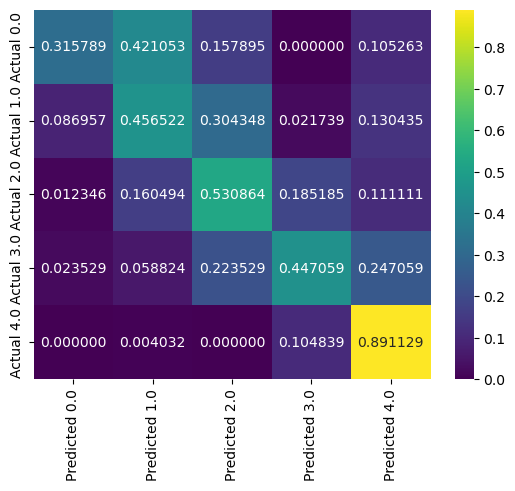

In [414]:
normal_heat_plot(y_test, y_predk)

## Putting All Accuracy Scores in a Data Frame

We can finally combine the data we gathered and draw a conclusion as to which predictive machine learning model is the most suitable to  categorize the **_GradeClass_** of students. We'll utilize a dataFrame to store and display our findings in a clear and legible way.

To achieve this, we'll first set up a **dictionary** containing the names of the training models as **keys** and the models themselves as **values**.

In [552]:
models = {
    'Categorical Naive Bayes': cnb,
    'Multinomial Naive Bayes': mnb,
    'Decision Tree': dtc,
    'Random Forest': rdf,
    'Support Vector Machine': smv,
    'K-Nearest Neighbors': knn,
}

Then, we'll create another dictionary that is initially empty, and fill it up using a **_for_** loop that will iterate through the models, train each model on the training data, predict the labels for the test data, calculate the accuracy of each model, and store the accuracy scores in the new dictionary based on the corresponding name key. So basically **repeat** the entire process we've gone through.

In [554]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_final = model.predict(X_test)
    t_accuracy = accuracy_score(y_test, y_pred_final)
    results[name] = t_accuracy

At last, we'll convert the **results** dictionary into a **DataFrame**, sort the accuracy values from highest to lowest and reset the indexes.

In [556]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']) # Creates a DataFrame with two columns.
results_df.sort_values(by='Accuracy', ascending=False, inplace=True) # Sort the accuracy scores in descending order.
results_df.reset_index(drop=True, inplace=True) # So the indexes are in ascending order. (0, 1, 2, ...)
results_df

,Model,Accuracy
0,Random Forest,0.910230
1,Support Vector Machine,0.858038
2,Categorical Naive Bayes,0.820459
3,Decision Tree,0.818372
4,Multinomial Naive Bayes,0.724426
5,K-Nearest Neighbors,0.686848


## Cross-Validation of Model Performance

At this stage, we've figured out **what** the most optimal model to use in predictive analysis of the dataset is, but we still don't know **how** optimal its accuracy is for sure. This is because we've only gone through regular validation of model predictions, with a dataset that's split and then kept constant for all future use. This is not an ideal situation, especially for real-life applications, as it can cause the model to in a way memorize the dataset and assess new data with an unwanted bias. To prevent this, **cross-validation** of the dataset is put to use.

Cross-validation is a more robust technique for assessing model performance by partitioning the data into multiple subsets or "folds" and iteratively training and validating the model. One of the most commonly used cross-validation methods is **K-Fold Cross Validation**, where the dataset is split into **_k_** equally sized folds. The model is then trained **_k_** times, each time using **_k-1_** folds for training and the remaining fold for validation. Finally, the performance metrics are averaged over the **_k_** folds.

The methods we'll be using, **_cross-val-score()_** and **_cross-val-predict()_**, were built based on this approach, and they will help us determine the **'actual'** accuracy score of the model. Since the real accuracy values are almost always less than the idealized validation estimates, it'll be enough for us to test the performance of the most accurate model, the **random forest classifier**, to see if there's a discrepancy in the dataset that substantially threw off the model or not.

These discrepancies come in the form of the **overfitting** or **underfitting** of the model. **Overfitting** occurs when a model learns the training data **too well**, including its noise and outliers, to the point that it performs poorly on new, unseen data. **Underfitting** occurs when a model is **too simple** to capture the underlying patterns in the data, resulting in poor performance on both the training and test data.

In [424]:
from sklearn.model_selection import cross_val_score

In [425]:
pi = accuracy_score(y_test, y_predf)
pi

0.9102296450939458

This is the accuracy score we found using **single-validation**. We'll compare it with the **cross-validated** result in a minute.

In [427]:
from sklearn.model_selection import cross_val_predict

The **_cross_val_predict()_** method works quite similary with the **_predict()_** method, with the main difference being that it takes both test variables to iteratively create and use the folds for training.

In [429]:
pred = cross_val_predict(rdf, X_test, y_test)
pred

array([3., 1., 4., 2., 4., 2., 4., 4., 4., 4., 4., 4., 2., 3., 1., 4., 2.,
       4., 2., 2., 1., 4., 3., 1., 3., 4., 3., 2., 4., 4., 3., 4., 2., 3.,
       4., 3., 4., 1., 4., 3., 4., 3., 2., 4., 3., 4., 1., 4., 4., 4., 3.,
       4., 1., 2., 1., 4., 1., 4., 4., 4., 4., 4., 2., 4., 4., 2., 4., 2.,
       4., 3., 2., 4., 3., 1., 4., 4., 3., 1., 4., 4., 4., 3., 3., 2., 2.,
       4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 3., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 4., 1., 3., 3., 2., 4., 4., 1., 4., 3., 4., 4.,
       4., 1., 3., 4., 3., 4., 4., 2., 4., 2., 2., 4., 4., 3., 2., 4., 4.,
       4., 3., 3., 3., 4., 2., 4., 4., 4., 4., 4., 2., 3., 4., 4., 1., 2.,
       3., 4., 2., 2., 4., 4., 3., 4., 1., 4., 2., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 2., 2., 4., 2., 4., 4., 2., 1., 1., 4., 4.,
       1., 4., 2., 2., 4., 3., 1., 4., 4., 4., 4., 4., 4., 4., 2., 1., 2.,
       2., 3., 1., 2., 3., 4., 4., 3., 3., 1., 4., 4., 4., 3., 3., 3., 3.,
       3., 3., 4., 2., 1.

Unlike before, there are **two** different ways we can calculate the accuracy scores in this instance. They are both **valid** metrics to consider and will allow to set a **range** of values that the accuracy lies on. Plus they won't be too far off from one another.

In [431]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress the specific warning and print a notification message instead.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    print(classification_report(y_test, pred)) # Check if any warnings were triggered.
    if any(issubclass(warn.category, UndefinedMetricWarning) for warn in w):
        print("Note: One or more labels with no predicted samples in the test data.")

              precision    recall  f1-score   support

         0.0       1.00      0.05      0.10        19
         1.0       0.67      0.74      0.70        46
         2.0       0.85      0.86      0.86        81
         3.0       0.92      0.89      0.90        85
         4.0       0.93      0.98      0.96       248

    accuracy                           0.89       479
   macro avg       0.87      0.71      0.70       479
weighted avg       0.89      0.89      0.87       479



In [432]:
pr = accuracy_score(y_test, pred)
pr

0.8872651356993737

This is the value we got from the model predictions being collected over **all folds** and compared to the true labels at the end, which returns a **single** accuracy score.

In [434]:
scores_n = cross_val_score(rdf, X_test, y_test, cv=10, scoring="accuracy")
scores_n

array([0.91666667, 0.95833333, 0.875     , 0.875     , 0.85416667,
       0.89583333, 0.89583333, 0.89583333, 0.79166667, 0.9787234 ])

The **_cross_val_score()_** method though,  computes the accuracy independently for each fold, and then averages them. Each fold has performed slightly differently due to variations in the training data (since each training set in a fold is slightly different). We'll get the **mean** of thes values to get our **alternate** accuracy value.

In [436]:
print(np.mean(scores_n))

0.8937056737588653


In [437]:
print("Difference: {:.4}".format(pi - pr)) # Biggest difference between the ideal and real accuracy scores.

Difference: 0.02296


Due to the difference of execution pertaining to the methods, we have in fact acquired different but close accuracy score, which we can assertively claim as the **real** accuracy score of the model, which means that there's neither an overfitting nor underfitting situation present in the model, as there's a net difference of at most **2.3%** in our **single-validated** and **cross-validated** accuracy scores.

## Conclusion

Based on the training and testing we've done, the supervised machine learning model for this particular dataset is the **Random Forest Classifer** model. Using regular validation, we got an accuracy score of a little over **91%**, and in our cross-validation, we observed that there was neither an overfitting nor underfitting issue regarding our training dataset as we got the more realisitic accuracy score range to be around **88-89%**, which shows that the model has actually learned, and not just memorized,information regarding the dataset. Meaning that for future predictive analysis of the dataset, this is the model that will be put to use.

## References

Rabie El Kharoua. (2024). 📚 Students Performance Dataset 📚 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/5195702